# Volatility Index Derivatives Analysis

In [2]:
# Import necessary libraries and apply settings
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series
import datetime
pd.options.display.max_rows = 9999
pd.options.mode.chained_assignment = None

### Load Data in Pandas

In [3]:
# Read data from csv
arc_data = pd.read_csv('/Users/akshatkumar/Downloads/data.csv')

In [4]:
arc_expiry = pd.read_csv('/Users/akshatkumar/Downloads/Expiry_Dates.csv', names = ['m_localSymbol','day'])

### Filter Data

In [5]:
# Select relevant attributes
arc_select = arc_data[['date','m_localSymbol','close']]

### Convert Data Daywise

In [7]:
arc_VIX_close = arc_select[arc_select['date'].str.contains('16:00:00')]
arc_SPX_close = arc_select[arc_select['date'].str.contains('15:30:00')]
# Extract day and time seperately
arc_VIX_close[['day','time']] = arc_VIX_close.date.str.split(" ",expand=True)
arc_SPX_close[['day','time']] = arc_SPX_close.date.str.split(" ",expand=True)
arc_VIX_close

date m_localSymbol   close         day      time
26     2015-12-31 16:00:00           VIX  18.210  2015-12-31  16:00:00
170    2016-01-04 16:00:00           VIX  20.700  2016-01-04  16:00:00
171    2016-01-04 16:00:00          VXM6  20.100  2016-01-04  16:00:00
172    2016-01-04 16:00:00          VXU6  20.850  2016-01-04  16:00:00
173    2016-01-04 16:00:00          VXH6  19.525  2016-01-04  16:00:00
174    2016-01-04 16:00:00          VXN6  20.400  2016-01-04  16:00:00
175    2016-01-04 16:00:00          VXK6  19.925  2016-01-04  16:00:00
176    2016-01-04 16:00:00          VXF6  19.825  2016-01-04  16:00:00
177    2016-01-04 16:00:00          VXJ6  19.775  2016-01-04  16:00:00
178    2016-01-04 16:00:00          VXG6  19.525  2016-01-04  16:00:00
179    2016-01-04 16:00:00          VXQ6  20.425  2016-01-04  16:00:00
323    2016-01-05 16:00:00          VXQ6  20.250  2016-01-05  16:00:00
324    2016-01-05 16:00:00          VXU6  20.450  2016-01-05  16:00:00
325    2016-01-05 16:00:00          VXJ6  19.475  2016-01-05  16:00:00
326    2016-01-05 16:00:00           VIX  19.340  2016-01-05  16:00:00
327    2016-01-05 16:00:00          VXM6  19.850  2016-01-05  16:00:00
328    2016-01-05 16:00:00          VXG6  19.275  2016-01-05  16:00:00
329    2016-01-05 16:00:00          VXF6  19.425  2016-01-05  16:00:00
330    2016-01-05 16:00:00          VXK6  19.600  2016-01-05  16:00:00
331    2016-01-05 16:00:00          VXN6  20.175  2016-01-05  16:00:00
332    2016-01-05 16:00:00          VXH6  19.225  2016-01-05  16:00:00
476    2016-01-06 16:00:00          VXM6  20.125  2016-01-06  16:00:00
477    2016-01-06 16:00:00          VXF6  20.325  2016-01-06  16:00:00
478    2016-01-06 16:00:00          VXH6  19.675  2016-01-06  16:00:00
479    2016-01-06 16:00:00           VIX  20.590  2016-01-06  16:00:00
480    2016-01-06 16:00:00          VXG6  19.825  2016-01-06  16:00:00
481    2016-01-06 16:00:00          VXJ6  19.875  2016-01-06  16:00:00
482    2016-01-06 16:00:00          VXQ6  20.475  2016-01-06  16:00:00
483    2016-01-06 16:00:00          VXN6  20.425  2016-01-06  16:00:00
484    2016-01-06 16:00:00          VXU6  20.725  2016-01-06  16:00:00
485    2016-01-06 16:00:00          VXK6  19.975  2016-01-06  16:00:00
629    2016-01-07 16:00:00          VXG6  21.775  2016-01-07  16:00:00
630    2016-01-07 16:00:00          VXF6  23.525  2016-01-07  16:00:00
631    2016-01-07 16:00:00          VXH6  21.175  2016-01-07  16:00:00
632    2016-01-07 16:00:00          VXK6  21.075  2016-01-07  16:00:00
633    2016-01-07 16:00:00           VIX  24.990  2016-01-07  16:00:00
634    2016-01-07 16:00:00          VXJ6  21.125  2016-01-07  16:00:00
635    2016-01-07 16:00:00          VXU6  21.225  2016-01-07  16:00:00
636    2016-01-07 16:00:00          VXQ6  21.325  2016-01-07  16:00:00
637    2016-01-07 16:00:00          VXN6  21.325  2016-01-07  16:00:00
638    2016-01-07 16:00:00          VXM6  21.125  2016-01-07  16:00:00
782    2016-01-08 16:00:00          VXQ6  22.175  2016-01-08  16:00:00
783    2016-01-08 16:00:00          VXH6  22.275  2016-01-08  16:00:00
784    2016-01-08 16:00:00          VXN6  22.200  2016-01-08  16:00:00
785    2016-01-08 16:00:00           VIX  27.010  2016-01-08  16:00:00
786    2016-01-08 16:00:00          VXJ6  22.100  2016-01-08  16:00:00
787    2016-01-08 16:00:00          VXU6  22.850  2016-01-08  16:00:00
788    2016-01-08 16:00:00          VXF6  25.275  2016-01-08  16:00:00
789    2016-01-08 16:00:00          VXK6  21.925  2016-01-08  16:00:00
790    2016-01-08 16:00:00          VXG6  23.075  2016-01-08  16:00:00
791    2016-01-08 16:00:00          VXM6  21.975  2016-01-08  16:00:00
935    2016-01-11 16:00:00          VXG6  21.975  2016-01-11  16:00:00
936    2016-01-11 16:00:00          VXK6  21.625  2016-01-11  16:00:00
937    2016-01-11 16:00:00          VXH6  21.575  2016-01-11  16:00:00
938    2016-01-11 16:00:00          VXQ6  22.000  2016-01-11  16:00:00
939    2016-01-11 16:00:00          VXJ6  21.6

In [830]:
# Drop redundant attributes
arc_VIX_close.drop(['date','time'], axis=1, inplace=True)
arc_SPX_close.drop(['date','time'], axis=1, inplace=True)

### String to datetime type conversion

In [831]:
arc_VIX_close['day'] = pd.to_datetime(arc_VIX_close['day'])
arc_SPX_close['day'] = pd.to_datetime(arc_SPX_close['day'])
arc_expiry['day'] = pd.to_datetime(arc_expiry['day'])

In [851]:
future_close = pd.merge(arc_expiry,arc_VIX_close, on=['day','m_localSymbol'], how='inner')

In [833]:
future_close = future_close.sort_values(by=['day'])

In [854]:
# Select closing value for each day
arc_VIX = arc_VIX_close[arc_select['m_localSymbol'] == 'VIX']
arc_SPX = arc_SPX_close[arc_select['m_localSymbol'] == 'SPX']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Join VIX and SPX data for comparison

In [855]:
# Join VIX and SPX data for analysis
join = arc_VIX.merge(arc_SPX, on='day', how='inner')

In [836]:
join

m_localSymbol_x  close_x        day m_localSymbol_y  close_y
0               VIX    18.21 2015-12-31             SPX  2043.76
1               VIX    20.70 2016-01-04             SPX  2012.96
2               VIX    19.34 2016-01-05             SPX  2016.70
3               VIX    20.59 2016-01-06             SPX  1990.70
4               VIX    24.99 2016-01-07             SPX  1943.37
5               VIX    27.01 2016-01-08             SPX  1921.96
6               VIX    24.30 2016-01-11             SPX  1923.56
7               VIX    22.47 2016-01-12             SPX  1938.94
8               VIX    25.22 2016-01-13             SPX  1890.19
9               VIX    23.95 2016-01-14             SPX  1921.28
10              VIX    27.02 2016-01-15             SPX  1880.23
11              VIX    26.05 2016-01-19             SPX  1881.26
12              VIX    27.59 2016-01-20             SPX  1859.60
13              VIX    26.69 2016-01-21             SPX  1868.73
14              VIX    22.34 2016-01-22             SPX  1906.75
15              VIX    24.15 2016-01-25             SPX  1877.26
16              VIX    22.50 2016-01-26             SPX  1903.70
17              VIX    23.11 2016-01-27             SPX  1883.32
18              VIX    22.42 2016-01-28             SPX  1893.17
19              VIX    20.20 2016-01-29             SPX  1938.25
20              VIX    19.98 2016-02-01             SPX  1938.67
21              VIX    21.98 2016-02-02             SPX  1903.16
22              VIX    21.65 2016-02-03             SPX  1912.47
23              VIX    21.84 2016-02-04             SPX  1915.22
24              VIX    23.38 2016-02-05             SPX  1879.82
25              VIX    26.00 2016-02-08             SPX  1853.58
26              VIX    26.54 2016-02-09             SPX  1852.29
27              VIX    26.29 2016-02-10             SPX  1851.55
28              VIX    28.14 2016-02-11             SPX  1828.59
29              VIX    25.40 2016-02-12             SPX  1864.34
30              VIX    24.11 2016-02-16             SPX  1895.28
31              VIX    22.31 2016-02-17             SPX  1926.48
32              VIX    21.64 2016-02-18             SPX  1917.56
33              VIX    20.53 2016-02-19             SPX  1917.60
34              VIX    19.38 2016-02-22             SPX  1945.14
35              VIX    20.98 2016-02-23             SPX  1921.26
36              VIX    20.72 2016-02-24             SPX  1929.59
37              VIX    19.11 2016-02-25             SPX  1951.67
38              VIX    19.81 2016-02-26             SPX  1947.78
39              VIX    17.09 2016-03-02             SPX  1986.26
40              VIX    16.70 2016-03-03             SPX  1993.35
41              VIX    16.86 2016-03-04             SPX  1999.57
42              VIX    17.35 2016-03-07             SPX  2001.38
43              VIX    18.67 2016-03-08             SPX  1979.51
44              VIX    18.34 2016-03-09             SPX  1988.89
45              VIX    18.05 2016-03-10             SPX  1989.61
46              VIX    16.50 2016-03-11             SPX  2021.87
47              VIX    16.92 2016-03-14             SPX  2019.48
48              VIX    16.84 2016-03-15             SPX  2015.74
49              VIX    14.99 2016-03-16             SPX  2027.58
50              VIX    14.44 2016-03-17             SPX  2040.66
51              VIX    14.02 2016-03-18             SPX  2049.18
52              VIX    13.79 2016-03-21             SPX  2051.46
53              VIX    14.17 2016-03-22             SPX  2050.07
54              VIX    14.94 2016-03-23             SPX  2036.81
55              VIX    14.74 2016-03-24             SPX  2035.96
56              VIX    15.24 2016-03-28             SPX  2037.23
57              VIX    13.82 2016-03-29             SPX  2055.20
58              VIX    13.56 2016-03-30             SPX  2064.02
59              VIX    13.95 2016-03-31             SPX  2059.70
60              VIX    13.10 2016-04-01

In [856]:
# Setting axis for plot 
X = join['day']
Y1 = join['close_x']
Y2 = join['close_y']

### Correlation between VIX and SPX

In [857]:
# Correlation between VIX and SPX
correlation = join['close_x'].corr(join['close_y'])
# Strong negative relationship between the SPX and VIX. 
# The relationship is negative because, as one variable increases, the other variable decreases.
correlation

-0.8191729292422193

### Plot VIX and SPX on the same chart

Text(0.5, 1.0, 'VIX vs SPX Behaviour')

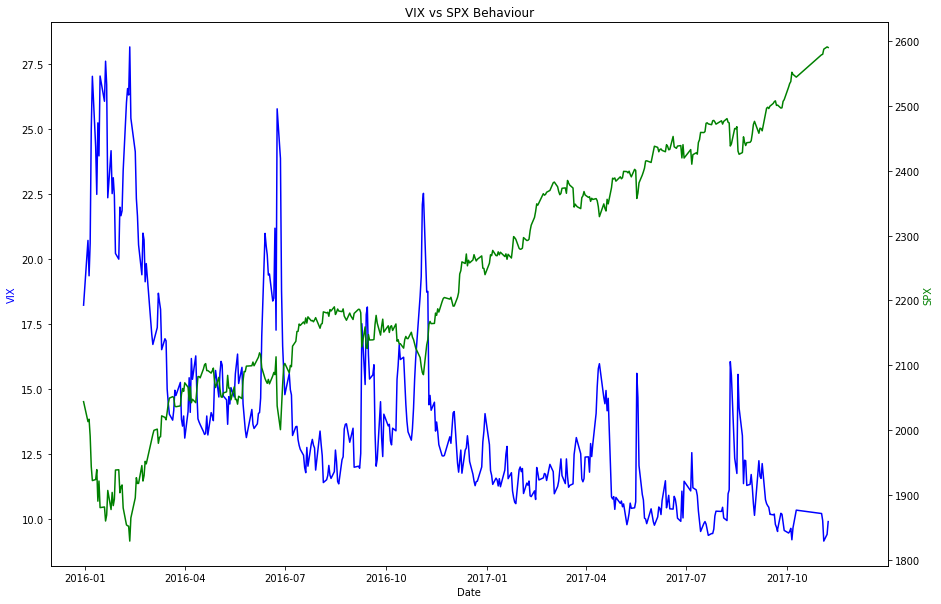

In [839]:
# Comparing VIX and SPX values on the date range on the same plot
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 31)])
ax2 = ax1.twinx()
ax1.plot(X,Y1,'b-')
ax2.plot(X,Y2,'g-')

ax1.set_xlabel('Date')
ax1.set_ylabel('VIX', color='b')
ax2.set_ylabel('SPX', color='g')
ax1.set_title('VIX vs SPX Behaviour')

### Plot and observe 50 day Moving Average Model

In [840]:
# Moving Average
join['VIXMA'] = join.rolling(window=50)['close_x'].mean()
join['SPXMA'] = join.rolling(window=50)['close_y'].mean()
Y3 = join['VIXMA']
Y4 = join['SPXMA']

Text(0.5, 1.0, 'VIX 50 day Moving Average')

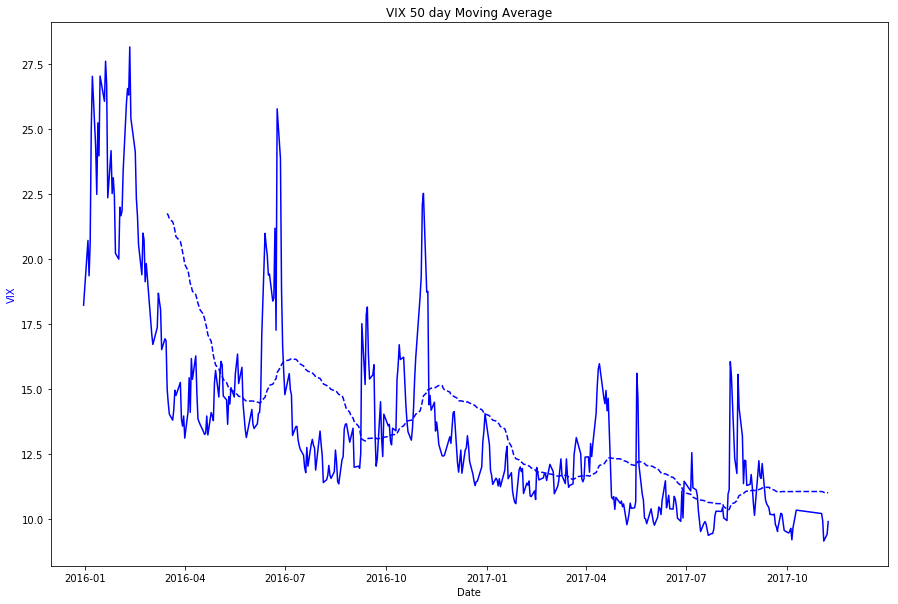

In [666]:
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 31)])
ax1.plot(X,Y1,'b-')
ax1.plot(X,Y3,'b--')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX', color='b')
ax1.set_title('VIX 50 day Moving Average')

### Plot and observe relation between VIX and SPX

Text(0.5, 1.0, 'VIX vs SPX Behaviour')

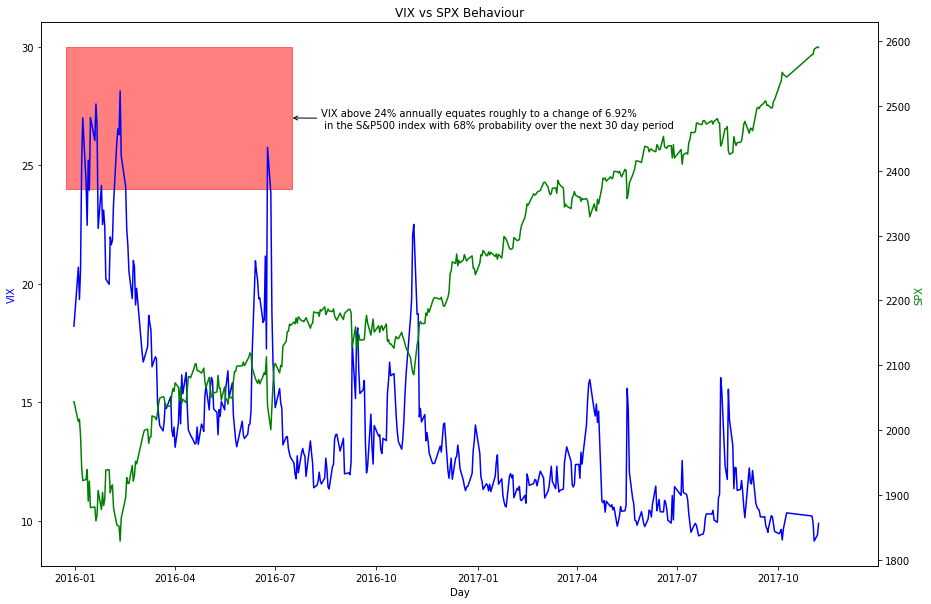

In [841]:
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.axhspan(24, 30, 0.03, 0.3, color='r', alpha=0.50)
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 31)])
ax2 = ax1.twinx()
ax1.plot(X,Y1,'b-')
ax2.plot(X,Y2,'g-')
ax1.annotate("VIX above 24% annually equates roughly to a change of 6.92% \n in the S&P500 index with 68% probability over the next 30 day period", xy=(datetime.date(2016, 7, 15), 27),  xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax1.set_xlabel('Day')
ax1.set_ylabel('VIX', color='b')
ax2.set_ylabel('SPX', color='g')
ax1.set_title('VIX vs SPX Behaviour')

### Observe VIX Behaviour during market selloff (S&P drops in value)

Text(0.5, 1.0, 'VIX vs SPX Behaviour in Market Selloff')

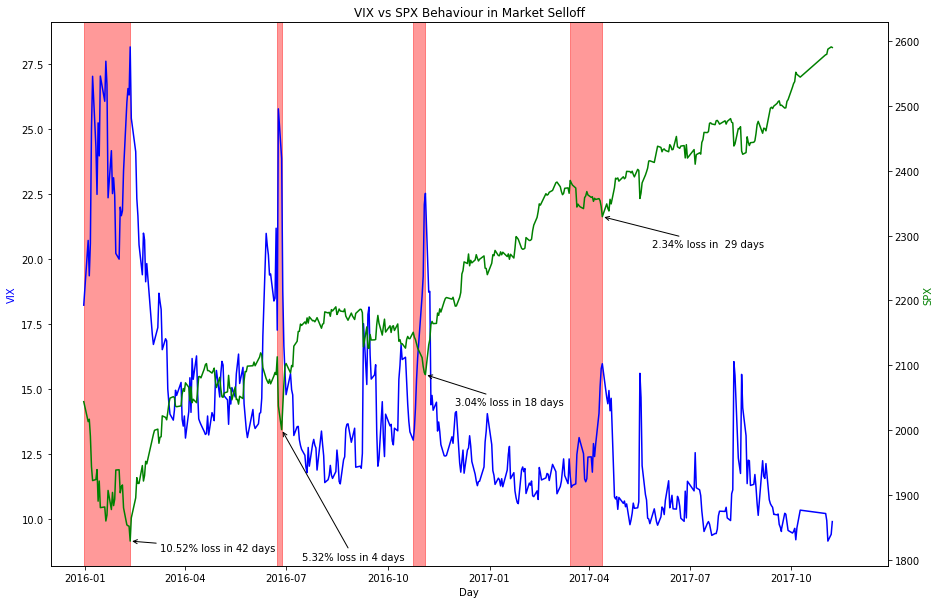

In [842]:
# Comparing VIX and SPX values on the date range on the same plot
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.axvspan(datetime.date(2015, 12, 31), datetime.date(2016, 2, 11), color='r', alpha=0.40)
ax1.axvspan(datetime.date(2016, 6, 23), datetime.date(2016, 6, 27), color='r', alpha=0.40)
ax1.axvspan(datetime.date(2016, 10, 24), datetime.date(2016, 11, 4), color='r', alpha=0.40)
ax1.axvspan(datetime.date(2017, 3, 15), datetime.date(2017, 4, 13), color='r', alpha=0.40)

style = dict(size=10, color='black')
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 27)])
ax2 = ax1.twinx()

ax2.annotate("10.52% loss in 42 days", xy=(datetime.date(2016, 2, 11), 1828.59),  xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))


ax2.annotate("5.32% loss in 4 days", xy=(datetime.date(2016, 6, 27), 2000.54),  xycoords='data',
            xytext=(20, -130), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax2.annotate("3.04% loss in 18 days", xy=(datetime.date(2016, 11, 4), 2085.41),  xycoords='data',
            xytext=(30, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax2.annotate("2.34% loss in  29 days", xy=(datetime.date(2017, 4, 13), 2329.25),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))

ax1.plot(X,Y1,'b-')
ax2.plot(X,Y2,'g-')
ax1.set_xlabel('Day')
ax1.set_ylabel('VIX', color='b')
ax2.set_ylabel('SPX', color='g')
ax1.set_title('VIX vs SPX Behaviour in Market Selloff')

In [843]:
arc_close = arc_select[arc_select['date'].str.contains('16:00:00')]
arc_close['date'] = pd.to_datetime(arc_close['date'])
arc_close

date m_localSymbol   close
26    2015-12-31 16:00:00           VIX  18.210
170   2016-01-04 16:00:00           VIX  20.700
171   2016-01-04 16:00:00          VXM6  20.100
172   2016-01-04 16:00:00          VXU6  20.850
173   2016-01-04 16:00:00          VXH6  19.525
174   2016-01-04 16:00:00          VXN6  20.400
175   2016-01-04 16:00:00          VXK6  19.925
176   2016-01-04 16:00:00          VXF6  19.825
177   2016-01-04 16:00:00          VXJ6  19.775
178   2016-01-04 16:00:00          VXG6  19.525
179   2016-01-04 16:00:00          VXQ6  20.425
323   2016-01-05 16:00:00          VXQ6  20.250
324   2016-01-05 16:00:00          VXU6  20.450
325   2016-01-05 16:00:00          VXJ6  19.475
326   2016-01-05 16:00:00           VIX  19.340
327   2016-01-05 16:00:00          VXM6  19.850
328   2016-01-05 16:00:00          VXG6  19.275
329   2016-01-05 16:00:00          VXF6  19.425
330   2016-01-05 16:00:00          VXK6  19.600
331   2016-01-05 16:00:00          VXN6  20.175
332   2016-01-05 16:00:00          VXH6  19.225
476   2016-01-06 16:00:00          VXM6  20.125
477   2016-01-06 16:00:00          VXF6  20.325
478   2016-01-06 16:00:00          VXH6  19.675
479   2016-01-06 16:00:00           VIX  20.590
480   2016-01-06 16:00:00          VXG6  19.825
481   2016-01-06 16:00:00          VXJ6  19.875
482   2016-01-06 16:00:00          VXQ6  20.475
483   2016-01-06 16:00:00          VXN6  20.425
484   2016-01-06 16:00:00          VXU6  20.725
485   2016-01-06 16:00:00          VXK6  19.975
629   2016-01-07 16:00:00          VXG6  21.775
630   2016-01-07 16:00:00          VXF6  23.525
631   2016-01-07 16:00:00          VXH6  21.175
632   2016-01-07 16:00:00          VXK6  21.075
633   2016-01-07 16:00:00           VIX  24.990
634   2016-01-07 16:00:00          VXJ6  21.125
635   2016-01-07 16:00:00          VXU6  21.225
636   2016-01-07 16:00:00          VXQ6  21.325
637   2016-01-07 16:00:00          VXN6  21.325
638   2016-01-07 16:00:00          VXM6  21.125
782   2016-01-08 16:00:00          VXQ6  22.175
783   2016-01-08 16:00:00          VXH6  22.275
784   2016-01-08 16:00:00          VXN6  22.200
785   2016-01-08 16:00:00           VIX  27.010
786   2016-01-08 16:00:00          VXJ6  22.100
787   2016-01-08 16:00:00          VXU6  22.850
788   2016-01-08 16:00:00          VXF6  25.275
789   2016-01-08 16:00:00          VXK6  21.925
790   2016-01-08 16:00:00          VXG6  23.075
791   2016-01-08 16:00:00          VXM6  21.975
935   2016-01-11 16:00:00          VXG6  21.975
936   2016-01-11 16:00:00          VXK6  21.625
937   2016-01-11 16:00:00          VXH6  21.575
938   2016-01-11 16:00:00          VXQ6  22.000
939   2016-01-11 16:00:00          VXJ6  21.625
940   2016-01-11 16:00:00          VXU6  22.350
941   2016-01-11 16:00:00          VXN6  22.025
942   2016-01-11 16:00:00           VIX  24.300
943   2016-01-11 16:00:00          VXM6  21.775
944   2016-01-11 16:00:00          VXF6  23.475
1088  2016-01-12 16:00:00          VXH6  20.775
1089  2016-01-12 16:00:00          VXK6  20.825
1090  2016-01-12 16:00:00          VXG6  21.075
1091  2016-01-12 16:00:00          VXJ6  20.825
1092  2016-01-12 16:00:00          VXF6  22.075
1093  2016-01-12 16:00:00           VIX  22.470
1094  2016-01-12 16:00:00          VXN6  21.225
1095  2016-01-12 16:00:00          VXU6  22.500
1096  2016-01-12 16:00:00          VXQ6  21.275
1097  2016-01-12 16:00:00          VXM6  20.975
1241  2016-01-13 16:00:00          VXK6  22.275
1242  2016-01-13 16:00:00          VXM6  22.275
1243  2016-01-13 16:00:00          VXN6  22.450
1244  2016-01-13 16:00:00          VXJ6  22.375
1245  2016-01-13 16:00:00           VIX  25.220
1246  2016-01-13 16:00:00          VXH6  22.525
1247  2016-01-13 16:00:00          VXQ6  22.400
1248  2016-01-13 16:00:00          VXU6  22.825
1249  2016-01-13 16:00:00          VXG6  23.125
1250  2016-01-13 16:00:00          VXF6  24.725
1394  2016-01-14 16:00:00          VXU6  22.375
1395  2016-01-14 16:00:00          VX

### Transform Data to get corresponding values of VIX Futures in a seperate column

In [844]:
arc_stack = arc_close.groupby(['date','m_localSymbol']).sum()['close'].unstack()

In [845]:
arc_stack

m_localSymbol  index                date    VIX    VXF6    VXF7    VXF8  \
0                  0 2015-12-31 16:00:00  18.21     NaN     NaN     NaN   
1                  1 2016-01-04 16:00:00  20.70  19.825     NaN     NaN   
2                  2 2016-01-05 16:00:00  19.34  19.425     NaN     NaN   
3                  3 2016-01-06 16:00:00  20.59  20.325     NaN     NaN   
4                  4 2016-01-07 16:00:00  24.99  23.525     NaN     NaN   
5                  5 2016-01-08 16:00:00  27.01  25.275     NaN     NaN   
6                  6 2016-01-11 16:00:00  24.30  23.475     NaN     NaN   
7                  7 2016-01-12 16:00:00  22.47  22.075     NaN     NaN   
8                  8 2016-01-13 16:00:00  25.22  24.725     NaN     NaN   
9                  9 2016-01-14 16:00:00  23.95  23.575     NaN     NaN   
10                10 2016-01-15 16:00:00  27.02  26.475     NaN     NaN   
11                11 2016-01-19 16:00:00  26.05  25.850     NaN     NaN   
12                12 2016-01-20 16:00:00  27.59  28.325     NaN     NaN   
13                13 2016-01-21 16:00:00  26.69     NaN     NaN     NaN   
14                14 2016-01-22 16:00:00  22.34     NaN     NaN     NaN   
15                15 2016-01-25 16:00:00  24.15     NaN     NaN     NaN   
16                16 2016-01-26 16:00:00  22.50     NaN     NaN     NaN   
17                17 2016-01-27 16:00:00  23.11     NaN     NaN     NaN   
18                18 2016-01-28 16:00:00  22.42     NaN     NaN     NaN   
19                19 2016-01-29 16:00:00  20.20     NaN     NaN     NaN   
20                20 2016-02-01 16:00:00  19.98     NaN     NaN     NaN   
21                21 2016-02-02 16:00:00  21.98     NaN     NaN     NaN   
22                22 2016-02-03 16:00:00  21.65     NaN     NaN     NaN   
23                23 2016-02-04 16:00:00  21.84     NaN     NaN     NaN   
24                24 2016-02-05 16:00:00  23.38     NaN     NaN     NaN   
25                25 2016-02-08 16:00:00  26.00     NaN     NaN     NaN   
26                26 2016-02-09 16:00:00  26.54     NaN     NaN     NaN   
27                27 2016-02-10 16:00:00  26.29     NaN     NaN     NaN   
28                28 2016-02-11 16:00:00  28.14     NaN     NaN     NaN   
29                29 2016-02-12 16:00:00  25.40     NaN     NaN     NaN   
30                30 2016-02-16 16:00:00  24.11     NaN     NaN     NaN   
31                31 2016-02-17 16:00:00  22.31     NaN     NaN     NaN   
32                32 2016-02-18 16:00:00  21.64     NaN     NaN     NaN   
33                33 2016-02-19 16:00:00  20.53     NaN     NaN     NaN   
34                34 2016-02-22 16:00:00  19.38     NaN     NaN     NaN   
35                35 2016-02-23 16:00:00  20.98     NaN     NaN     NaN   
36                36 2016-02-24 16:00:00  20.72     NaN     NaN     NaN   
37                37 2016-02-25 16:00:00  19.11     NaN     NaN     NaN   
38                38 2016-02-26 16:00:00  19.81     NaN     NaN     NaN   
39                39 2016-03-02 16:00:00  17.09     NaN     NaN     NaN   
40                40 2016-03-03 16:00:00  16.70     NaN     NaN     NaN   
41                41 2016-03-04 16:00:00  16.86     NaN     NaN     NaN   
42                42 2016-03-07 16:00:00  17.35     NaN     NaN     NaN   
43                43 2016-03-08 16:00:00  18.67     NaN     NaN     NaN   
44                44 2016-03-09 16:00:00  18.34     NaN     NaN     NaN   
45                45 2016-03-10 16:00:00  18.05     NaN     NaN     NaN   
46                46 2016-03-11 16:00:00  16.50     NaN     NaN     NaN   
47                47 2016-03-14 16:00:00  16.92     NaN     NaN     NaN   
48                48 2016-03-15 16:00:00  16.84     NaN     NaN     NaN   
49                49 2016-03-16 16:00:00  14.99     NaN     NaN     NaN   
50                50 2016-03-17 16:00:00  14.44     NaN     NaN     NaN   
51                51 2016-03-18 16:00:00  14.02     NaN     NaN     NaN   
52                52 2016

### Plot and observe Spot VIX and VIX Futures relative movement 

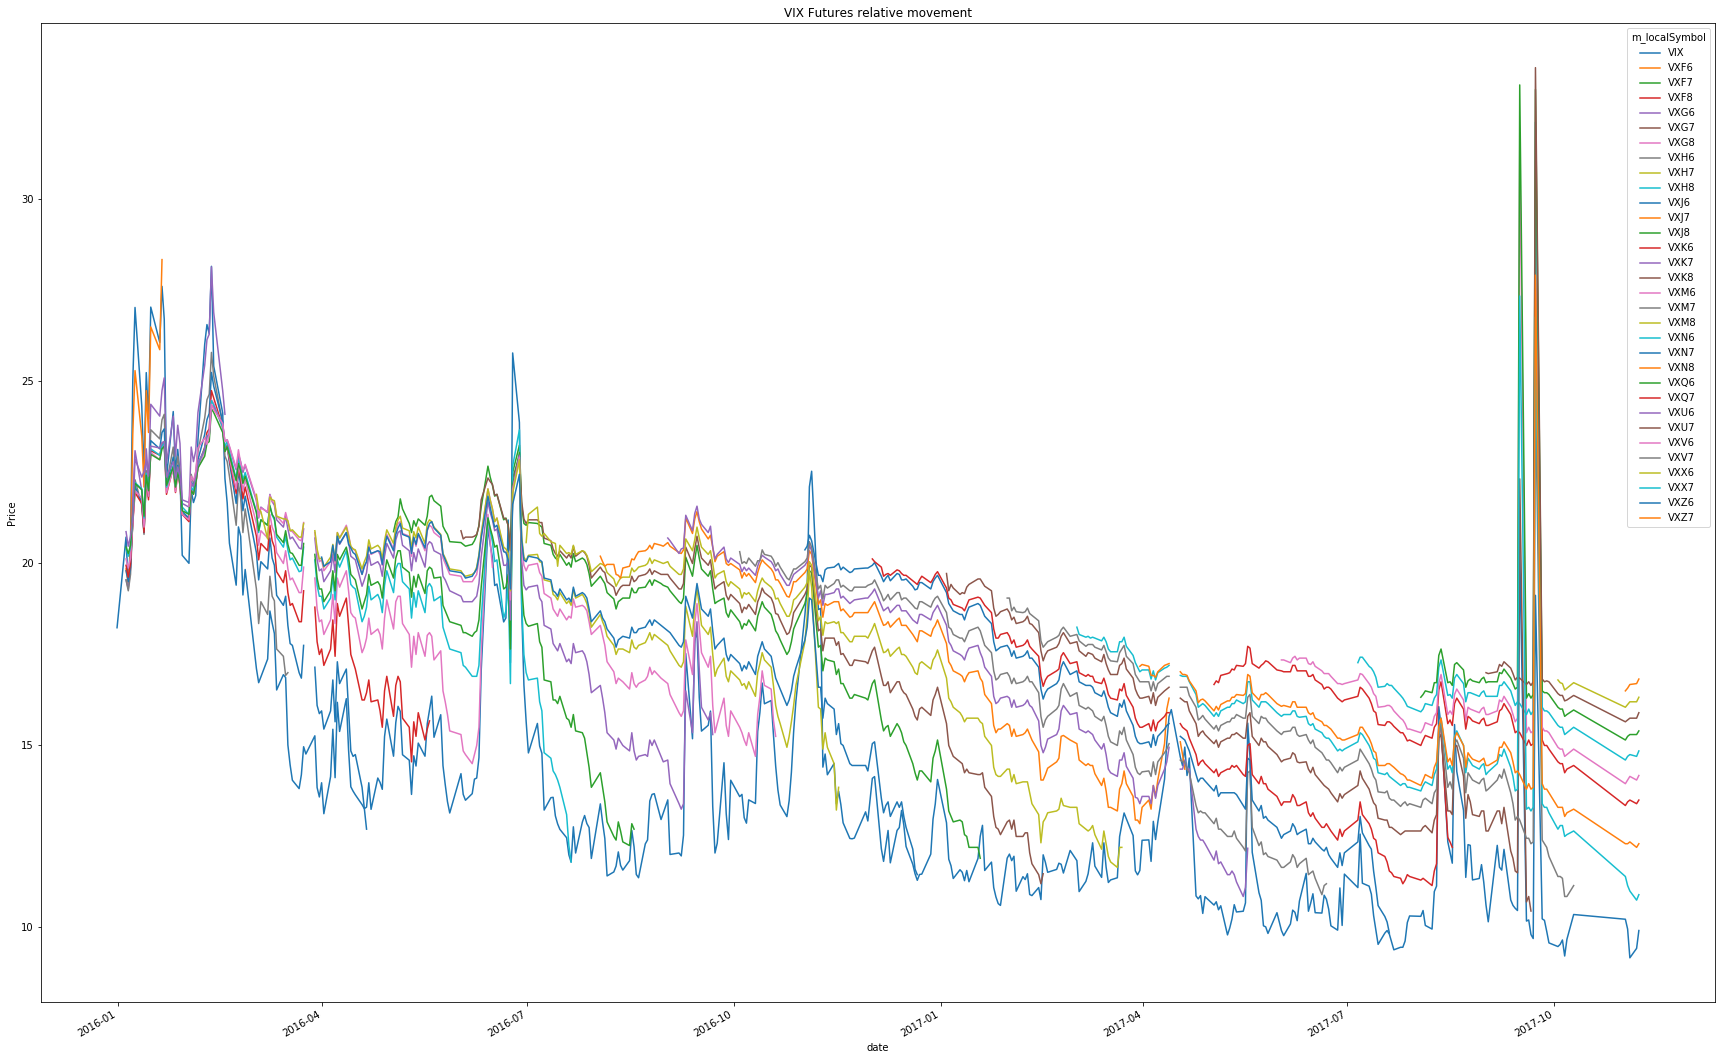

In [846]:
#VIX futures converge to the VIX’s value at expiration but prior to that they following their own path—usually charging a premium to the VIX
fig, ax = plt.subplots(figsize=(30,20))
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title('VIX Futures relative movement')
arc_stack.plot(ax=ax, linestyle='-')

### VIX Futures Contracts Behaviour Combined for 2016-2017
#### Shown by connecting prices of all futures contracts but different expiration dates for 2 years

In [782]:
future_close

m_localSymbol        day   close
0           VXF6 2016-01-20  28.325
2           VXG6 2016-02-17  24.075
4           VXH6 2016-03-16  16.975
6           VXJ6 2016-04-20  12.675
8           VXK6 2016-05-18  15.650
10          VXM6 2016-06-15  19.875
12          VXN6 2016-07-20  11.775
14          VXQ6 2016-08-17  12.675
16          VXU6 2016-09-21  15.275
18          VXV6 2016-10-19  15.225
19          VXX6 2016-11-16  13.825
20          VXZ6 2016-12-21  11.425
1           VXF7 2017-01-18  11.875
3           VXG7 2017-02-15  11.450
5           VXH7 2017-03-22  12.175
7           VXJ7 2017-04-19  14.325
9           VXK7 2017-05-17  12.150
11          VXM7 2017-06-21  11.175
13          VXN7 2017-07-19   9.825
15          VXQ7 2017-08-16  12.175
17          VXU7 2017-09-20  10.425

Text(0.5, 1.0, 'VIX Futures')

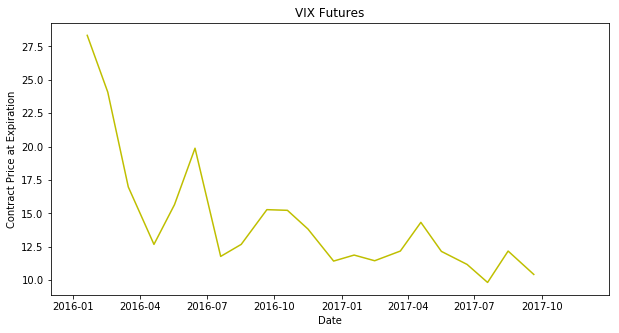

In [799]:
fig, ax1 = plt.subplots(figsize=[10,5])
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 31)])
ax1.plot(future_close['day'],future_close['close'],'y')
ax1.set_xlabel('Date')
ax1.set_ylabel('Contract Price at Expiration')
ax1.set_title('VIX Futures')

### VIX Futures behaviour in market selloff
#### Shown by taking a single VIX Futures contract

In [849]:
arc_stack = arc_stack.reset_index()
v1 = arc_stack['VIX']
v2 = arc_stack['VXQ6']
date = arc_stack['date']

Text(0.5, 1.0, 'VIX Futures behaviour during selloff')

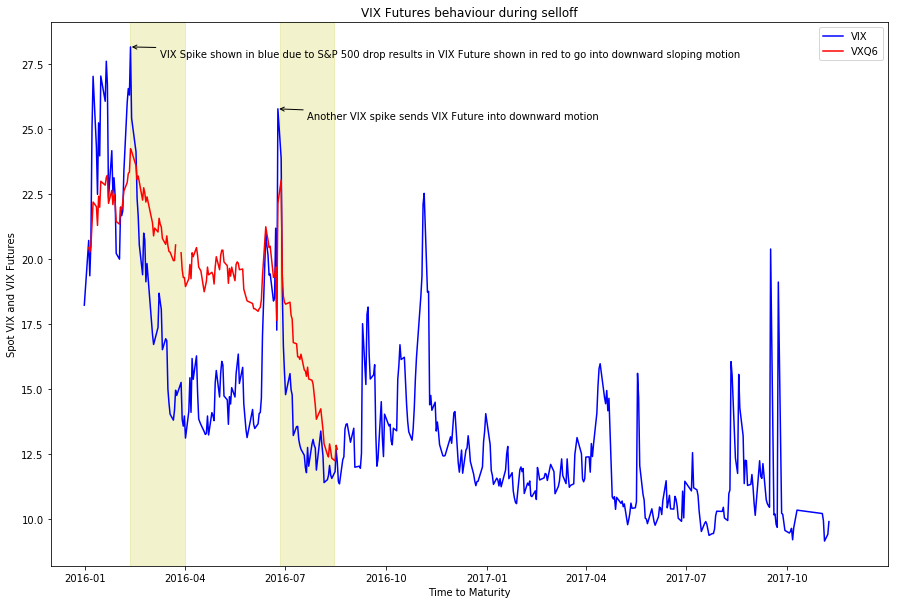

In [859]:
fig, ax1 = plt.subplots(figsize=[15,10])
ax1.set_xlim([datetime.date(2015, 12, 1), datetime.date(2017, 12, 31)])
ax1.plot(date,v1,'b')
ax1.plot(date,v2,'r')
ax1.axvspan(datetime.date(2016, 2, 11), datetime.date(2016, 4, 1), color='y', alpha=0.2)
ax1.axvspan(datetime.date(2016, 6, 27), datetime.date(2016, 8, 15), color='y', alpha=0.2)
ax1.annotate("VIX Spike shown in blue due to S&P 500 drop results in VIX Future shown in red to go into downward sloping motion", xy=(datetime.date(2016, 2, 11), 28.14),  xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax1.annotate("Another VIX spike sends VIX Future into downward motion", xy=(datetime.date(2016, 6, 24), 25.76),  xycoords='data',
            xytext=(30, -10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"))
ax1.set_xlabel('Time to Maturity')
ax1.set_ylabel('Spot VIX and VIX Futures')
ax1.legend()
ax1.set_title('VIX Futures behaviour during selloff')

### Detailed analysis, interpretations and conclusions can be found out in the report